# Building a decision tree model with Scikit-learn - pgs 72-80 from Python Textbook

### Import neccessary libraries

In [1]:
import graphviz
import mglearn
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
%matplotlib inline
import matplotlib.pyplot as plt

### Loading the breast cancer dataset

In [2]:
#Load the dataset
cancer = load_breast_cancer()




### Building the decision tree model

In [3]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)






### Controlling complexity of Decision Trees

In [4]:
#Set parameters for training the model
tree = DecisionTreeClassifier(max_depth=4, random_state=0)




### Analyzing and visualizing Decision Trees

Accuracy on training set: 0.988
Accuracy on test set: 0.951


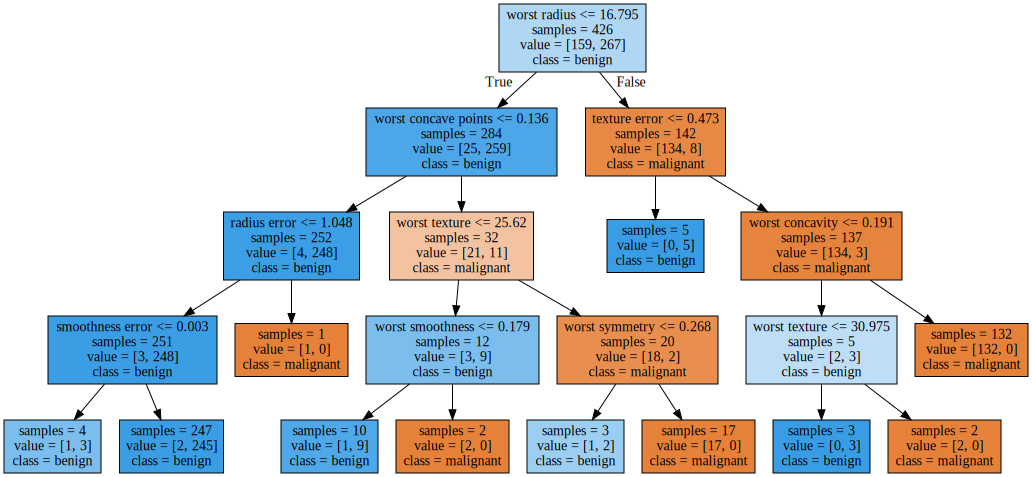

In [5]:
#Train the model
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#Visualize the tree
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
    feature_names=cancer.feature_names, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))





### Simplify the decision tree model via adjusting parameters (pruning)

In [26]:
#Set parameters for training the model to reduce complexity
tree = DecisionTreeClassifier(max_depth=3, random_state=0, min_samples_split = 20)
#Train the model
tree.fit(X_train, y_train)

#Test the adjusted tree
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))








Accuracy on training set: 0.977
Accuracy on test set: 0.944


### Analyzing feature importance in trees

Feature importances: [0. 1.]


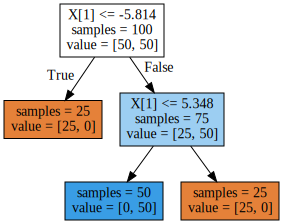

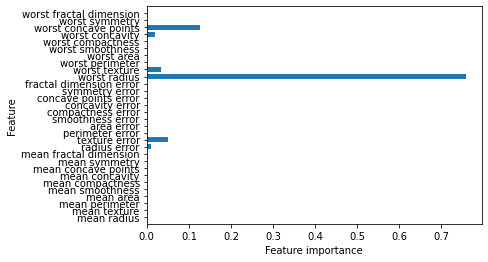

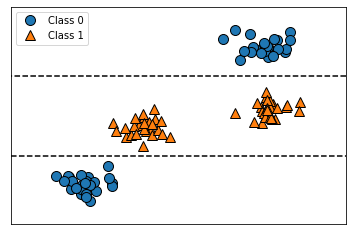

In [27]:
#View adjusted decision tree
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

#Create feature importance bar chart based on the cancer dataset
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

#View scatter plot showing decision boundaries and classes
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# Differences and similarities between DT and kNN models

Differences between the two models, DT (decision trees) and KNN (k-nearest neighbors) include that KNN is a lazy-learner model while decision trees are eager-learner. This means that KNN does most of its processing when running predictions rather than when training the model, and the opposite would be true for DT. Furthermore, KNN tends to outperform decision trees when dealing with rare occurrences, due to these classes often being removed during the pruning process when simplifying the DT model, while staying in the saved dataset of the KNN model.
Similarities include that both models are non-parametric, meaning that they both do not make strong assumptions about the mapping function or training data, and seek to best fit the training data when building the mapping function. Furthermore, they are both supervised machine learning algorithms, used for classification or regression via training on labeled datasets.

